### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [7]:
# Importing library
library(ggplot2)
library(lubridate) # To extract month from date

In [8]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [9]:
head(ny)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [10]:
# data structure of New York City
str(ny)

'data.frame':	54770 obs. of  9 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...


In [11]:
head(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
6,1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [12]:
# data structure of Washington
str(wash)

'data.frame':	89051 obs. of  7 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...


In [13]:
head(chi)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
3,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
4,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
5,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
6,1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [14]:
# data structure Chicago
str(chi)

'data.frame':	8630 obs. of  9 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year   : num  1992 1992 1981 1986 1975 ...


#### Data Wrangling

A bit of manipulation of data to make task easier

In [15]:
# Creating null columns of 'Gender' and 'Birth.Year' in the Washington dataset to be able to concatenate all
wash$Gender <- NA
wash$Birth.Year <-NA

In [16]:
# Adding a new column 'City' to each dataset to retain info about city after concatenation
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [17]:
#Creating a function for concatenation
concatenation <- function(d1, d2) {
  return(rbind(d1, d2))
}

In [18]:
# Concatenating all three datasets together as "city"
city <- concatenation(ny,wash)     #city <- rbind(ny, wash)
city <- concatenation(city,chi)    #city <- rbind(city, chi)
head(city)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City


### Question 1


**What is the average travel time for users in different cities?**

##Trip duration

In [19]:
# Count of users in City
total_city = sort(table(city$City))
print(total_city)

# percentage of users in City
round((total_city / sum(total_city) * 100), digits = 2)


      Chicago New York City    Washington 
         8630         54770         89051 



      Chicago New York City    Washington 
         5.66         35.93         58.41 

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”


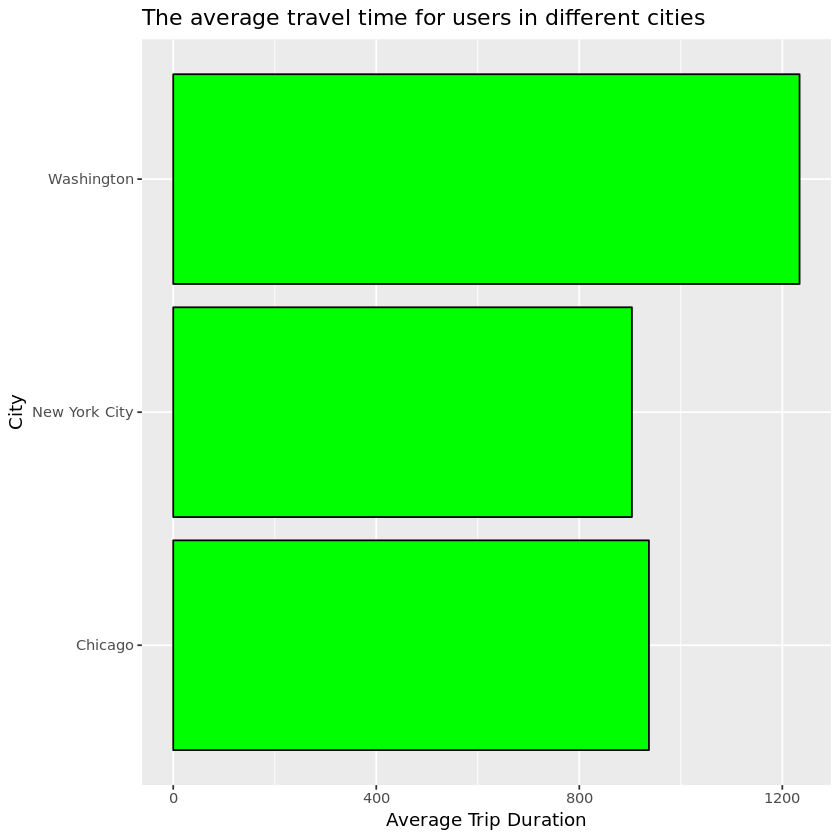

In [34]:
# Visualizing data with ggplot
ggplot(aes(x = City, y = Trip.Duration), data = city) +
    geom_bar(position = 'dodge', stat = "summary", fun.y = "mean", fill = "green", colour="black") + 
    ggtitle('The average travel time for users in different cities') +
    labs(y = 'Average Trip Duration', x = 'City') +
    coord_flip()

In [21]:
my.summary <- with(city, aggregate(list(Trip.Duration), by = list(City), 
                   FUN = function(x) { mon.mean = mean(x, na.rm = TRUE) } ))

colnames(my.summary) <- c('City', 'Average.Trip.Duration')
my.summary

City,Average.Trip.Duration
<chr>,<dbl>
Chicago,937.1728
New York City,903.6147
Washington,1233.9533


**Summary of your question 1 results goes here.**
* Percentage count of users in `Chicago is 5.66%`, `New York City is 35.93%` and `Washington is 58.41%`.
* `Washington`(1233.9533) is leading among all of them in average trip duration due to more number of users.
* The average ride duration in `Chicago`(937.1728) and `New York City`(903.6147) cities is more or less the same.
* Although the number of users in Chicago is comparatively less among all, but average trip duration is almost same with New York City.

### Question 2

**What are the counts of each gender (only available for NYC and Chicago)?**

##User info

In [22]:
# Creating new city2 by binding 'New York City' and 'Chicago' data
# Here omitting Washington data is done due to lack of information about 'Gender' and 'Birth.Year'

city2 <- concatenation(chi,ny)      #city2 <- rbind(chi, ny)

In [23]:
# Count of Gender (Male and Female)
total = sort(table(city2$Gender))
print(total)

# percentage of Gender (Male and Female)
round((total / length(city2$Gender) * 100), digits = 2)


       Female   Male 
  7158  13882  42360 



       Female   Male 
 11.29  21.90  66.81 

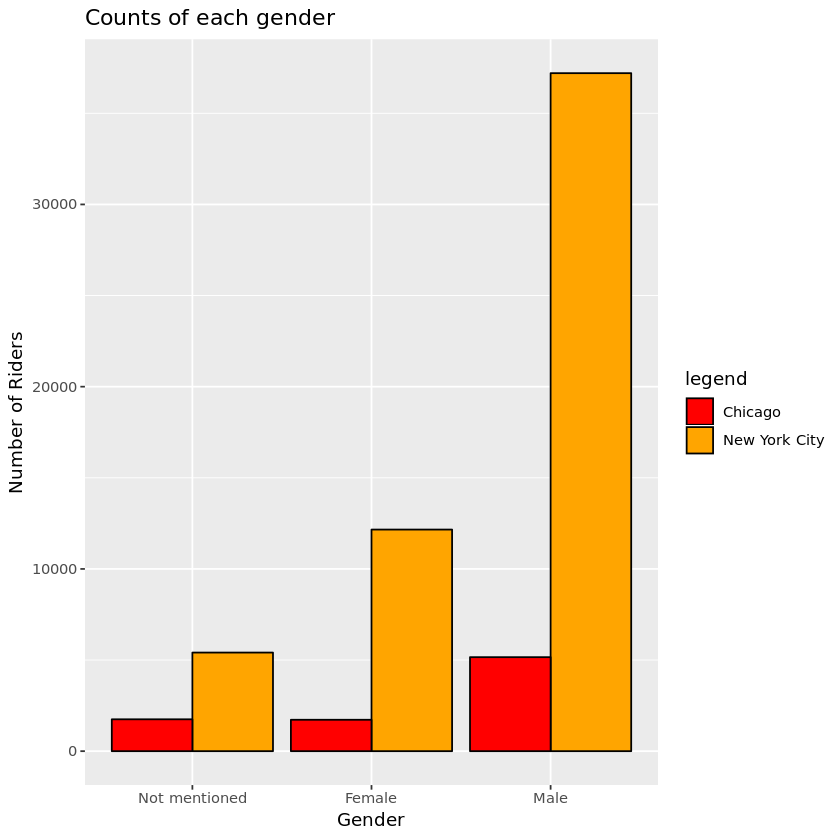

In [35]:
# Visualizing data with ggplot
ggplot(aes(x = Gender, fill = City), data = city2) +
    geom_bar(position = 'dodge', colour="black") +
    ggtitle('Counts of each gender') +
    scale_x_discrete(labels = c('Not mentioned', 'Female', 'Male')) +
    labs(y = 'Number of Riders', x = 'Gender') +
    scale_fill_manual("legend", values = c("Chicago" = "red", "New York City" = "orange"))

In [25]:
# Count of Gender(Male and Female) in Chicago
total_chi = sort(table(city2$Gender[city2$City == 'Chicago']))
print(total_chi)

# percentage of Gender(Male and Female) in Chicago
round((total_chi / length(city2$Gender[city2$City == 'Chicago']) * 100), digits = 2)


Female          Male 
  1723   1748   5159 



Female          Male 
 19.97  20.25  59.78 

In [26]:
# Count of Gender(Male and Female) in New York City
total_ny = sort(table(city2$Gender[city2$City == 'New York City']))
print(total_ny)

# percentage of Gender(Male and Female) in Chicago
round((total_ny / length(city2$Gender[city2$City == 'New York City']) * 100), digits = 2)


       Female   Male 
  5410  12159  37201 



       Female   Male 
  9.88  22.20  67.92 

**Summary of your question 2 results goes here.**

Here omitting Washington data is done due to lack of information about 'Gender' and 'Birth.Year'.
* In Chicago and New York City, number of users:
    * Male         : 42360 (66.81%)
    * Female       : 13882 (21.90%)
    * Not Mentioned: 7158  (11.29%)
* In New York City, among all users there are `67.92% of Male` , `22.20% of Female` and `9.88% of Not Mentioned'.
* In Chicago, among all users there are `59.78% of Male` , `19.97% of Female` and `20.25% of Not Mentioned`.
* By a large magnitude `Males` (42360) tends to rent more bikes than `Females` (13882) do, across both Chicago and New York City.
* Number of data points were null and for some reason riders did not disclose their gender. 

### Question 3

**What is the most common month?**

##Popular time of travel (i.e., occurs most often in the start time)

In [27]:
# Re-formatting of date columns
city$Start.Time <- ymd_hms(city$Start.Time)
city$End.Time <- ymd_hms(city$End.Time)

Warning message:
“ 1 failed to parse.”


In [28]:
# Creating new column 'Month' extracting from Start.Time
city$Month <- month(city$Start.Time)

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


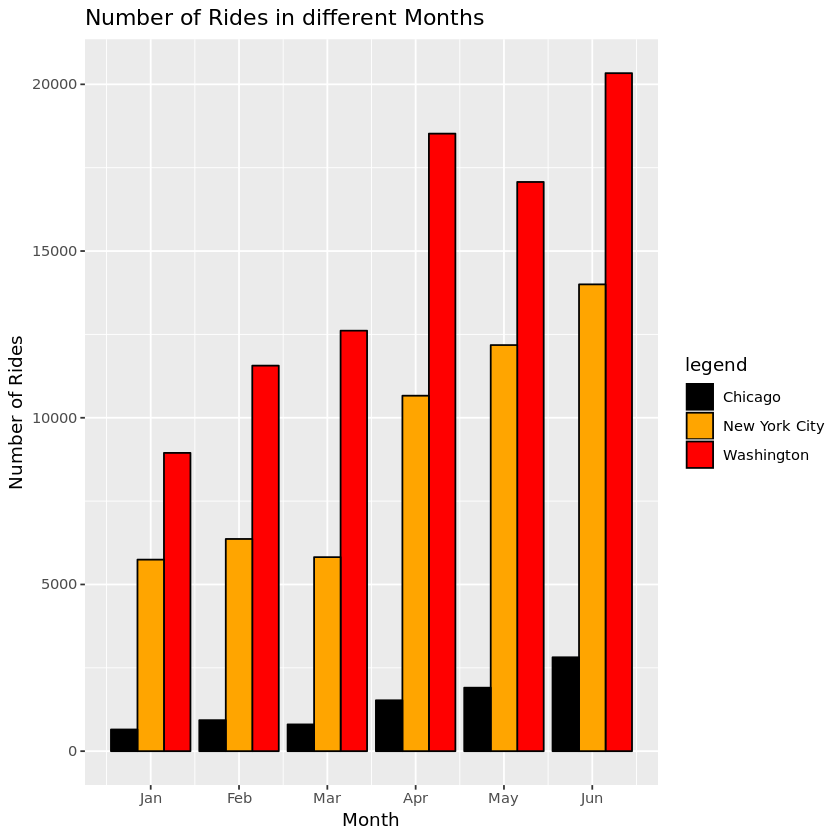

In [36]:
# Visualizing data with ggplot
ggplot(aes(x = Month, fill = City), data = city) +
    geom_bar(position = 'dodge', colour="black") +
    scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')) +
    ggtitle('Number of Rides in different Months') +
    labs(y = 'Number of Rides', x = 'Month') +
    scale_fill_manual("legend", values = c("Chicago" = "black", "New York City" = "orange", "Washington" = "red"))

In [30]:
# Load function
source("http://pcwww.liv.ac.uk/~william/R/crosstab.r")

###################################################################################

`Function created by Dr Paul Williamson, Dept. of Geography and Planning,       
 School of Environmental Sciences, University of Liverpool, UK.                  
 Adapted from the function ctab() in the catspec packge.                         
 Version: 12th July 2013                                                         
 Output best viewed using the companion function print.crosstab()`               
###################################################################################

In [31]:
# Count and percentage of users per month
crosstab(city, row.vars = "Month")

     
Month     Count   Total %
  1    15341.00     10.06
  2    18857.00     12.37
  3    19235.00     12.62
  4    30709.00     20.14
  5    31157.00     20.44
  6    37151.00     24.37
  Sum 152450.00    100.00

In [32]:
# Count of users per month by grouped by cities
crosstab(city, row.vars = "Month", col.vars = "City")

# Percentage of users per month by grouped by cities
crosstab(city, row.vars = "Month", col.vars = "City", type = "r")

      City Chicago New York City Washington    Sum
Month                                             
1              650          5745       8946  15341
2              930          6364      11563  18857
3              803          5820      12612  19235
4             1526         10661      18522  30709
5             1905         12180      17072  31157
6             2816         14000      20335  37151
Sum           8630         54770      89050 152450

      City Chicago New York City Washington    Sum
Month                                             
1             4.24         37.45      58.31 100.00
2             4.93         33.75      61.32 100.00
3             4.17         30.26      65.57 100.00
4             4.97         34.72      60.31 100.00
5             6.11         39.09      54.79 100.00
6             7.58         37.68      54.74 100.00

**Summary of your question 3 results goes here.**

* The most popular month in all three Chicago, New York City, Washington is month `6 (JUNE) with 24.37%` followed by 5 (May) with 20.44% and so on.
* Least common month is `1 (JANUARY) with 10.06%`.
* Again `Washington` with an average of 59.45% is leading among all of them followed by `New York City` with an average of 35.30% and `Chicago` with an average of 5.25%.
* Which makes sense, because people drive bikes more in the summer than the other seasons, which justify the increment in the number of trips in each month because the weather is getting nicer (no more rain).

In [33]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')